<a href="https://colab.research.google.com/github/realBagher/fundemental_Ai_algorithms/blob/main/Gradient_Descnet/Regression_GradientDescent_FromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Housing_train.csv')
test = pd.read_csv('/content/Housing_test.csv')

In [ ]:
train = data.drop('price',axis=1)
y = data['price']

In [ ]:
train

,area,bedrooms,bathrooms,stories,parking
0,3630,3,3,2,0
1,2800,3,1,1,0
2,2430,3,1,1,0
3,3480,2,1,1,1
4,4000,3,1,1,0
...,...,...,...,...,...
96,6540,3,1,1,2
97,7231,3,1,2,0
98,6254,4,2,1,1
99,7320,4,2,2,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   area       101 non-null    int64
 1   bedrooms   101 non-null    int64
 2   bathrooms  101 non-null    int64
 3   stories    101 non-null    int64
 4   parking    101 non-null    int64
dtypes: int64(5)
memory usage: 4.1 KB


In [ ]:
def predict(features, weights, bias):
    return np.dot(features, weights) + bias

def mse_loss(predictions, labels):
    return np.mean((predictions - labels) ** 2)

def gradient_descent(features, labels, weights, bias, learning_rate, num_iterations):
    m = len(features)
    losses = []

    for i in range(num_iterations):
        # Make predictions
        predictions = predict(features, weights, bias)

        # Calculate the loss
        loss = mse_loss(predictions, labels)
        losses.append(loss)

        # Calculate the gradients
        gradient = np.dot(features.T, (predictions - labels)) / m
        bias_gradient = np.mean(predictions - labels)

        # Update the weights and bias
        weights -= learning_rate * gradient
        bias -= learning_rate * bias_gradient

        if i % 100 == 0:
            print(f'Iteration {i}, loss = {loss:.4f}')
    return weights, bias, losses


In [ ]:
test

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
439,2730000,6800,2,1,1,0
440,2730000,4000,3,1,2,1
441,2695000,4000,2,1,1,0
442,2660000,3934,2,1,1,0


In [ ]:
ytest = test['price']
xtest = test.drop(['price'],axis=1)

In [ ]:
def gradient_descent(features, labels, weights, bias, learning_rate, num_iterations):
    m = len(features)
    losses = []

    for i in range(num_iterations):
        # Make predictions
        predictions = predict(features, weights, bias)

        # Calculate the loss
        loss = mse_loss(predictions, labels)
        losses.append(loss)

        # Calculate the gradients
        gradient = np.dot(features.T, (predictions - labels)) / m
        bias_gradient = np.mean(predictions - labels)

        # Update the weights and bias
        weights -= learning_rate * gradient
        bias -= learning_rate * bias_gradient

        # Adaptive learning rate
        if i > 0 and losses[-1] < losses[-2]:
            learning_rate *= 1.25
        else:
            learning_rate *= 0.5

        if i % 100 == 0:
            print(f'Iteration {i}, loss = {loss:.4f}, learning_rate = {learning_rate:.18f}')

    return weights, bias, losses


In [ ]:
# Initialize the weights and bias
num_features = len(train.columns)
weights = np.zeros(num_features)
bias = 0

# Train the model
learning_rate = 0.00001
num_iterations = 10000
weights, bias, losses = gradient_descent(train, y, weights, bias, learning_rate, num_iterations)

# Make predictions on the testing set
predictions = predict(xtest, weights, bias)

# Evaluate the model
mse = mse_loss(predictions, ytest)
print(f'MSE on testing set: {mse:.4f}')


Iteration 0, loss = 17260550308143.5645, learning_rate = 0.000005000000000000
Iteration 100, loss = 1262910250541.5752, learning_rate = 0.000000070747492803
Iteration 200, loss = 1262892058876.4285, learning_rate = 0.000000097757963632
Iteration 300, loss = 1262872350064.3855, learning_rate = 0.000000135080680245
Iteration 400, loss = 1262851860779.6333, learning_rate = 0.000000186652723701
Iteration 500, loss = 1262847517562.6353, learning_rate = 0.000000041266288209
Iteration 600, loss = 1262812942474.6162, learning_rate = 0.000000142553048245
Iteration 700, loss = 1262939746124.9670, learning_rate = 0.000000031516471109
Iteration 800, loss = 1262995234788.4258, learning_rate = 0.000000043549049081
Iteration 900, loss = 1262753732486.7109, learning_rate = 0.000000150438771311
Iteration 1000, loss = 1262736044929.1768, learning_rate = 0.000000083149733521
Iteration 1100, loss = 1262715672989.8452, learning_rate = 0.000000045958087296
Iteration 1200, loss = 1262696272399.5847, learning

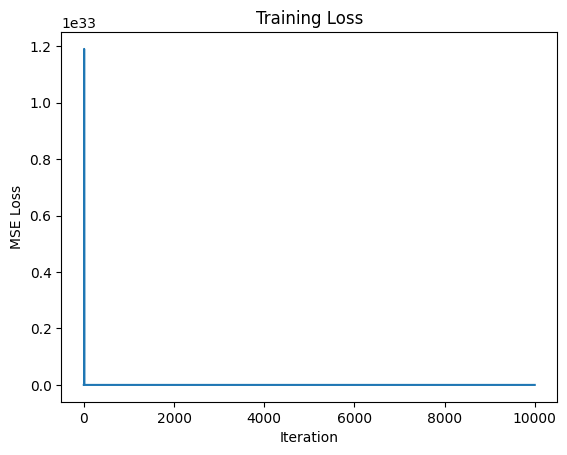

In [ ]:
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.show()

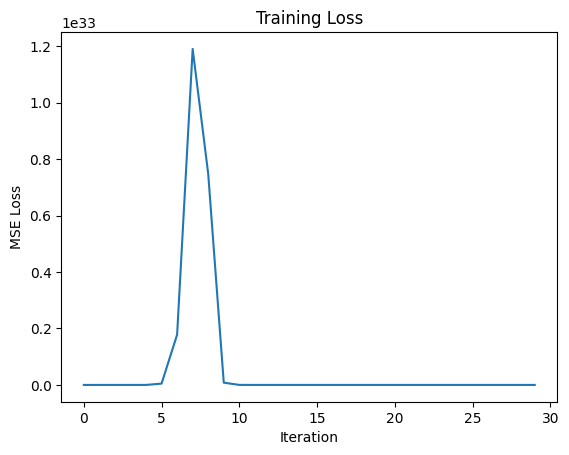

In [ ]:
plt.plot(losses[:30])
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.show()

In [ ]:
# Initialize the weights and bias
num_features = len(train.columns)
weights = np.zeros(num_features)
bias = 0

train_normalized = (train - train.mean()) / train.std()
# Train the model
learning_rate = 0.00001
num_iterations = 10000
weights, bias, losses = gradient_descent(train_normalized, y, weights, bias, learning_rate, num_iterations)

# Make predictions on the testing set
predictions = predict(xtest, weights, bias)

# Evaluate the model
mse = mse_loss(predictions, ytest)
print(f'MSE on testing set: {mse:.4f}')

Iteration 0, loss = 17260550308143.5645, learning_rate = 0.000005000000000000
Iteration 100, loss = 788403774997.6158, learning_rate = 0.000017272337110189
Iteration 200, loss = 788403774997.6158, learning_rate = 0.000000000000000000
Iteration 300, loss = 788403774997.6158, learning_rate = 0.000000000000000000
Iteration 400, loss = 788403774997.6158, learning_rate = 0.000000000000000000
Iteration 500, loss = 788403774997.6158, learning_rate = 0.000000000000000000
Iteration 600, loss = 788403774997.6158, learning_rate = 0.000000000000000000
Iteration 700, loss = 788403774997.6158, learning_rate = 0.000000000000000000
Iteration 800, loss = 788403774997.6158, learning_rate = 0.000000000000000000
Iteration 900, loss = 788403774997.6158, learning_rate = 0.000000000000000000
Iteration 1000, loss = 788403774997.6158, learning_rate = 0.000000000000000000
Iteration 1100, loss = 788403774997.6158, learning_rate = 0.000000000000000000
Iteration 1200, loss = 788403774997.6158, learning_rate = 0.00

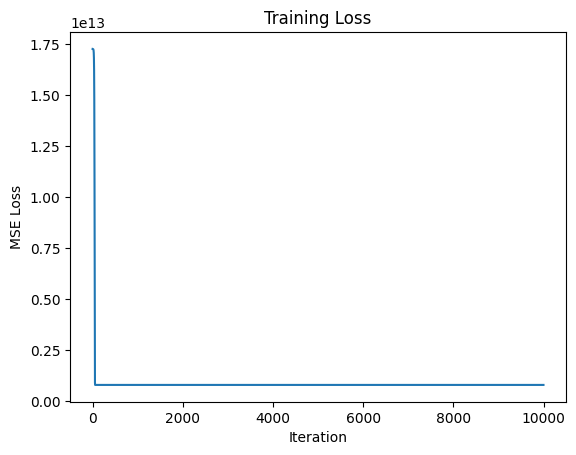

In [ ]:
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.show()

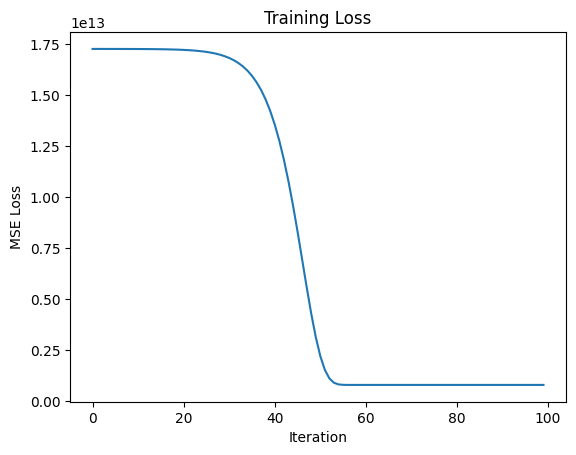

In [ ]:
plt.plot(losses[:100])
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.show()

In [ ]:
32224347749536546816.0000 > 3832062041435.3447

True